# Demo: Spectral Clustering with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture


In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F using build in data generators
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Plot Data

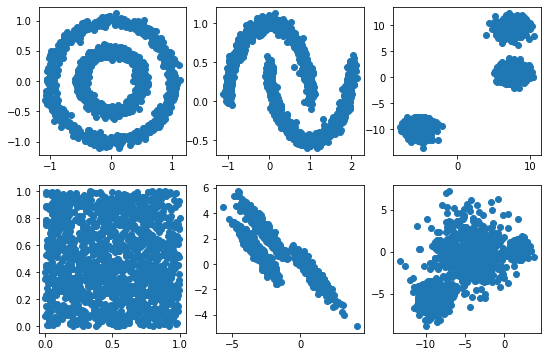

In [3]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1])
axes[0, 1].scatter(B[:,0], B[:,1])
axes[0, 2].scatter(C[:,0], C[:,1])
axes[1, 0].scatter(D[:,0], D[:,1])
axes[1, 1].scatter(E[:,0], E[:,1])
axes[1, 2].scatter(F[:,0], F[:,1])

## Spectral Clustering Demo
Perform ```Spectral``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

### Warning: default affinity is RBF!

/home/keuper/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/keuper/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


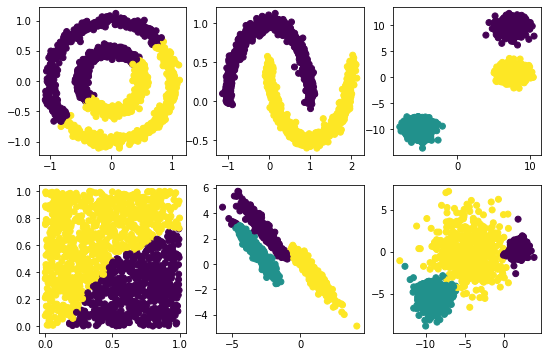

In [6]:
from sklearn.cluster import SpectralClustering
spectralA = SpectralClustering(n_clusters=2 , n_neighbors=5).fit(A) #train for given k
spectralB = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10).fit(B)
spectralC = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10).fit(C)
spectralD = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10).fit(D)
spectralE = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10).fit(E)
spectralF = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10).fit(F)

#plot again, now with lable coloring
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=spectralA.labels_) #get labels and use as color
axes[0, 1].scatter(B[:,0], B[:,1], c=spectralB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=spectralC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=spectralD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=spectralE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=spectralF.labels_)